In [26]:
import os
import numpy as np
import torch
from torch.utils.data import Dataset
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
from PIL import Image
from skimage import io, transform
from torchvision.utils import make_grid

import albumentations as A
from albumentations.augmentations.crops.transforms import RandomCrop
from albumentations.augmentations.geometric.rotate import Rotate
from albumentations.augmentations.transforms import HorizontalFlip, RGBShift
from albumentations.pytorch import ToTensorV2
%matplotlib inline

In [27]:
# check if CUDA is available
train_on_gpu = torch.cuda.is_available()

if not train_on_gpu:
    print('CUDA is not available.  Training on CPU ...')
else:
    print('CUDA is available!  Training on GPU ...')

CUDA is available!  Training on GPU ...


In [28]:
# define training and test data directories
data_dir = 'C:\\Users\\91865\\Desktop\\flower_photos/'
train_dir = os.path.join(data_dir, 'train/')
test_dir = os.path.join(data_dir, 'test/')

# classes are folders in each directory with these names
# classes = ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']
classes = os.listdir(train_dir)
classes

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

## Custom DataLoader

In [ ]:
data = []
for index,name in enumerate(classes):
    files =  os.listdir(os.path.join(test_dir,name))
    data+= list(zip(files,[index]*len(files)))
    
data[10:]
# imgfile,label =  data[0]
# print(imgfile,label)

# rodir = os.path.join(test_dir,classes[label])
# image = np.array(Image.open(os.path.join(rodir, imgfile)))
# image = io.imread(os.path.join(rodir, imgfile))

# # label = torch.tensor([label])
# print(type(image))
# print(type(label))

# # print(data)

In [30]:
class CustomImageFolder(Dataset):
    def __init__(self,root_dir,transform=None):
        super(CustomImageFolder,self).__init__()
        
        self.data = []
        self.root_dir = root_dir
        self.transform = transform
        self.class_names = os.listdir(root_dir)
        
        for index,name in enumerate(self.class_names):
            files =  os.listdir(os.path.join(self.root_dir,name))
            self.data+= list(zip(files,[index]*len(files)))
            
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self,index):
        
        imgfile,label =  self.data[index]
        rodir = os.path.join(self.root_dir,classes[label])
        image = np.array(Image.open(os.path.join(rodir, imgfile)))
        
#         image = io.imread(os.path.join(rodir, imgfile))
#         img = torch.from_numpy(image)
#         img = img.permute(2,0,1)
#         label = torch.tensor([label])
        

        
        if self.transform:
            augmentations = self.transform(image=image)
            image = augmentations["image"]
            
        
        return image,label
            

In [34]:
data_transform = A.Compose([A.Resize(width = 224, height = 224),
                                A.RandomCrop(width = 224, height = 224),
                                ToTensorV2()])
# daisy_dir = train_dir + 'daisy/'
# roses_dir = train_dir + 'roses/'

# daisy_data = CustomImageFolder(root_dir=daisy_dir,transform=data_transform)
# rosy_data = CustomImageFolder(root_dir=roses_dir,transform=data_transform)
                            
train_data = CustomImageFolder(root_dir=train_dir,transform=data_transform)
test_data = CustomImageFolder(root_dir=test_dir,transform=data_transform)

test_data
print(len(train_data),len(test_data))

3130 540


In [35]:
# define dataloader parameters
batch_size = 20
num_workers=0

# prepare data loaders
train_loader = torch.utils.data.DataLoader(dataset=train_data, batch_size=batch_size, 
                                           num_workers=num_workers, shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_data, batch_size=batch_size, 
                                          num_workers=num_workers, shuffle=True)

In [ ]:
for image,labels in test_loader:
    print(classes[labels[0]])

In [36]:
i = 0
for x,y in test_data:
    if i == 5: break
    print(x.shape)
    i+=1

torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])


In [37]:
examples = enumerate(train_loader)
batch_idx, (example_data, example_targets) = next(examples)
example_data.shape

torch.Size([20, 3, 224, 224])

<ipython-input-38-12bd7e90045f>:11: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])


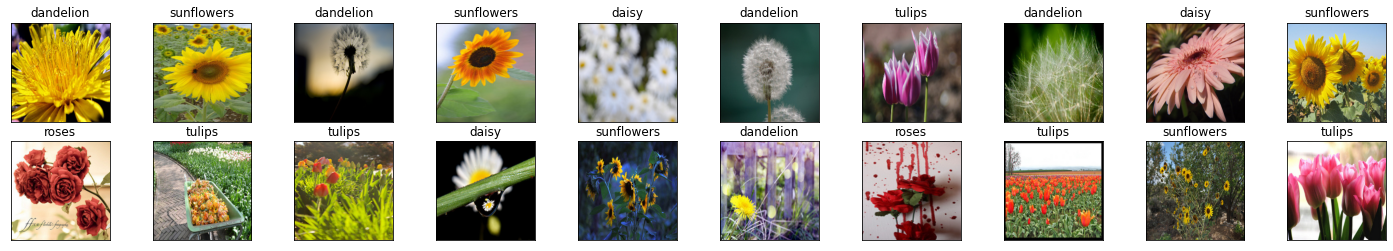

In [38]:
# Visualize some sample data

# obtain one batch of training images
dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.numpy() # convert images to numpy for display

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    plt.imshow(np.transpose(images[idx], (1, 2, 0)))
    ax.set_title(classes[labels[idx]])

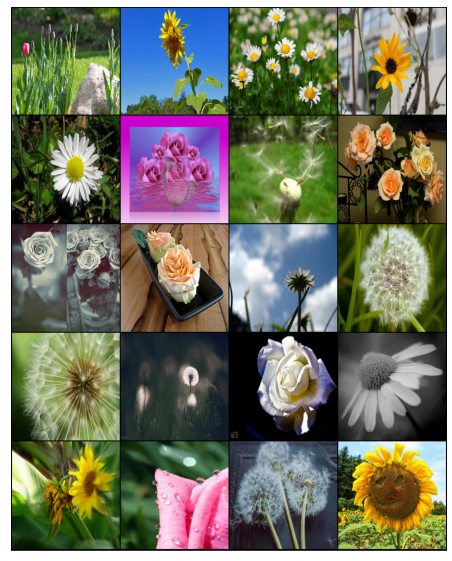

In [39]:
for images, labels in train_loader:
    
    fig, ax = plt.subplots(figsize = (10, 10))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(make_grid(images, 4).permute(1,2,0))
    break